<a href="https://colab.research.google.com/github/savmic/DeepLearningSchool/blob/main/Savenko_Michael_baseline_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

________________________________________________________________________________

Ник на Kaggle(название команды) **Michael_Savenko** 

________________________________________________________________________________

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1,
    0
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.7,
    0.7
]

roc_auc_score(y_true, y_predictions)

0.7222222222222222

In [ ]:
from google.colab import files
#uploaded = files.upload()

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


Посмотрим на 30 случайных строк из набора данных

In [ ]:
data.sample(30)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2709,1,89.90,89.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
4908,47,63.80,3007.25,Female,0,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,No,Yes,Two year,No,Bank transfer (automatic),0
3748,1,62.80,62.8,Male,0,No,No,Yes,No,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,0
3787,22,101.35,2317.1,Male,0,No,No,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),1
1506,52,50.20,2554,Male,0,Yes,Yes,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
703,72,116.80,8456.75,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0
2894,8,20.35,178.7,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
289,47,78.90,3650.35,Male,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,One year,Yes,Electronic check,0
4076,32,19.45,674.55,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),0
2384,2,19.65,31.2,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,0


Ничего необычного в глаза не бросается. Посмотрим на структуру данных

In [ ]:
print(data.shape)
print()
data.info() 

(5282, 20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 

Таблица с количеством NaN в каждой колонке

In [ ]:
data.isnull().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Видим, что в таблице 5282 строки, 20 столбцов, все данные заполнены, значения NaN отсутствуют

In [ ]:
data.describe()

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.159409,0.262022
std,24.550326,30.176464,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,0.000000,0.000000
50%,29.000000,70.400000,0.000000,0.000000
75%,55.000000,90.050000,0.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000


In [ ]:
#!pip install -U pandas-profiling

In [ ]:
#from pandas_profiling import ProfileReport

In [ ]:
#ProfileReport(data)

________________________________________________________________________________

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [ ]:
# В данных есть дубли, избавимся от них
data[data.duplicated()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1384,1,69.90,69.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
1474,1,20.05,20.05,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1636,1,19.65,19.65,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1959,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
2036,1,69.35,69.35,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
2586,1,20.20,20.2,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,1
2877,1,70.10,70.1,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
2991,1,20.90,20.9,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
3660,1,20.45,20.45,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
3749,1,20.20,20.2,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data[data.duplicated()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn


In [ ]:
num_cols #численные колонки(признаки)

['ClientPeriod', 'MonthlySpending', 'TotalSpent']

Посмотрим на гистограммы численнных колонок

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd24cb02710>,
      dtype=object)

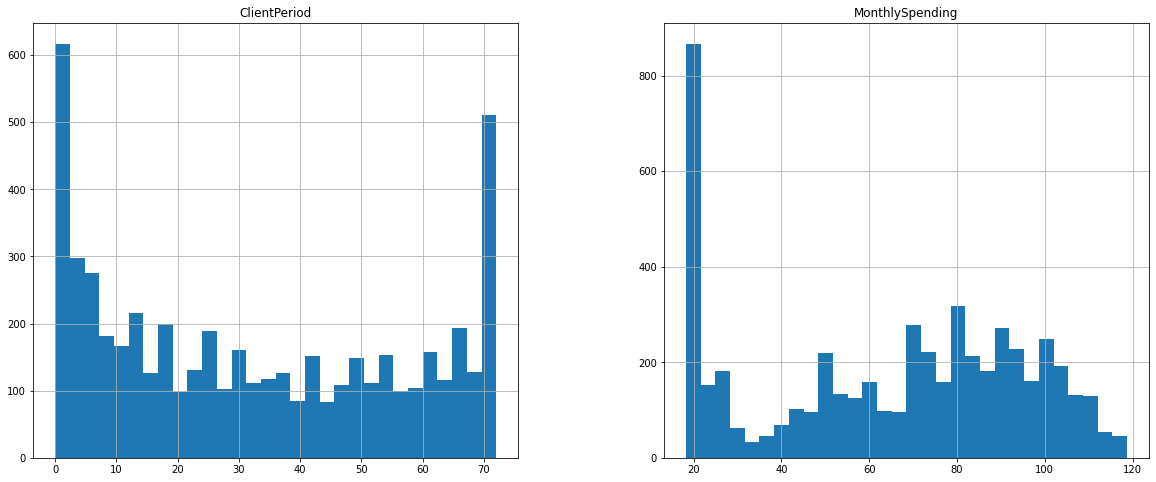

In [ ]:
data.hist(column=num_cols, figsize=(20, 8), bins=30)

Видим, что отрисовались только 2 графика, а должны были 3. 
Посмотрим, почему не отрисовался график с колонкой 'TotalSpent'

При попытке вызова data.hist(column=['TotalSpent']) появляется ошибка. Ошибка говорит, что поле не числовое, хотя должно быть. Преобразуем эту колонку. Если при преобразовании возникнет исключение, то значение поля станет равным 0

In [ ]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce').fillna(0)

In [ ]:
data['TotalSpent'].sort_values()
# В колонке появились нули

2543       0.00
4326       0.00
4598       0.00
3078       0.00
1707       0.00
         ...   
1327    8564.75
5127    8594.40
5268    8670.10
684     8672.45
5239    8684.80
Name: TotalSpent, Length: 5268, dtype: float64

Посмотрим на данные, где значение TotalSpent == 0

In [ ]:
data[data['TotalSpent'] == 0].head(10)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,0.0,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,0.0,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,0.0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,0.0,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,0.0,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,0.0,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,0.0,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,0.0,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,0.0,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [ ]:
len(data[data['TotalSpent'] == 0])

9

In [ ]:
data[data['TotalSpent'] == 0]['ClientPeriod'].unique()

array([0])

Мы видим, что в 9-и строках значение TotalSpent == 0, при этом ClientPeriod == 0.
Делаю вывод, что это только что подключившиеся клиенты, и поле TotalSpent пустое, т.к. они еще ничего не платили, но договор уже заключили.
Возможно клиент платит по факту оказания услуг. Эти строчки будут участвовать в анализе.

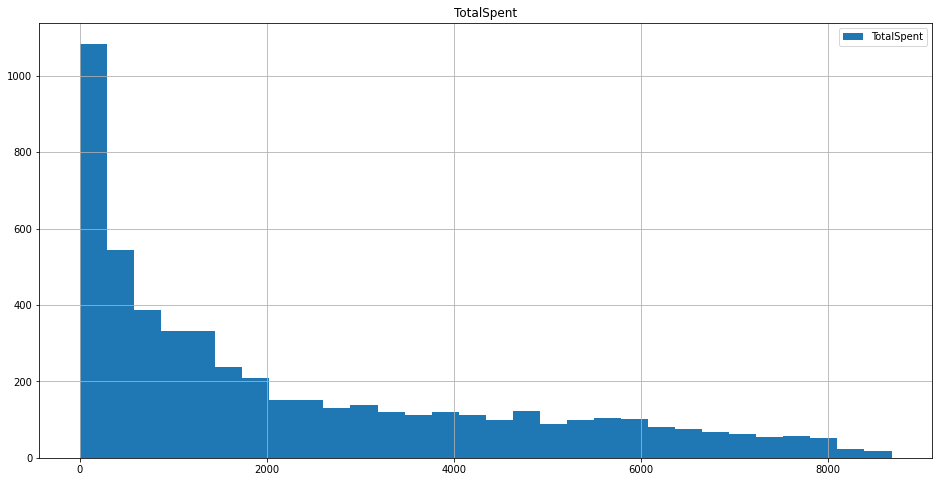

In [ ]:
data.hist(column=['TotalSpent'], figsize=(16, 8), bins = 30, legend=True);
# После преобразования данных гистограмма отрисовывается.

In [ ]:
cat_cols # Категориальные признаки

['Sex',
 'IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasDeviceProtection',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription',
 'HasContractPhone',
 'IsBillingPaperless',
 'PaymentMethod']

In [ ]:
# вспомогательные переменные для форматирования(выделения жирным) текста при выводе
start_bold = "\033[1m"
end_bold = "\033[0;0m"

Посмотрим на значения в категориальных колонках

In [ ]:
for c in cat_cols:
  print(f'Колонка: {start_bold}{c}{end_bold} \nзначения: {data[c].unique()}, \nколичество: \n{data[c].value_counts().to_frame(name="")}\n')

Колонка: Sex 
значения: ['Male' 'Female'], 
количество: 
            
Male    2647
Female  2621

Колонка: IsSeniorCitizen 
значения: [0 1], 
количество: 
       
0  4427
1   841

Колонка: HasPartner 
значения: ['Yes' 'No'], 
количество: 
         
No   2691
Yes  2577

Колонка: HasChild 
значения: ['Yes' 'No'], 
количество: 
         
No   3662
Yes  1606

Колонка: HasPhoneService 
значения: ['Yes' 'No'], 
количество: 
         
Yes  4747
No    521

Колонка: HasMultiplePhoneNumbers 
значения: ['No' 'Yes' 'No phone service'], 
количество: 
                      
No                2497
Yes               2250
No phone service   521

Колонка: HasInternetService 
значения: ['No' 'Fiber optic' 'DSL'], 
количество: 
                 
Fiber optic  2335
DSL          1798
No           1135

Колонка: HasOnlineSecurityService 
значения: ['No internet service' 'No' 'Yes'], 
количество: 
                         
No                   2604
Yes                  1529
No internet service  1135

Колонка: H

In [ ]:
def transform_index_to_list(st_i):
  """Функция для преобразования индекса в обычный список, последнее слово переносится на новую строку.
     Написана, потому что wrap не работает, названия значений bar'ов накладываются друг на друга на графике.
     Также преобразует числовое название в текстовое, например 1 в '1' """
  st_i2 =[]
  for i in range(len(st_i)):
    st = str(st_i[i])
    if st.count(' ') > 1:
      st = '\n'.join(st.rsplit(' ', 1))
    st_i2.append(st)
  return st_i2


Отрисуем bar'ы для категориальных признаков на одном графике(с использованием plt.subplot).

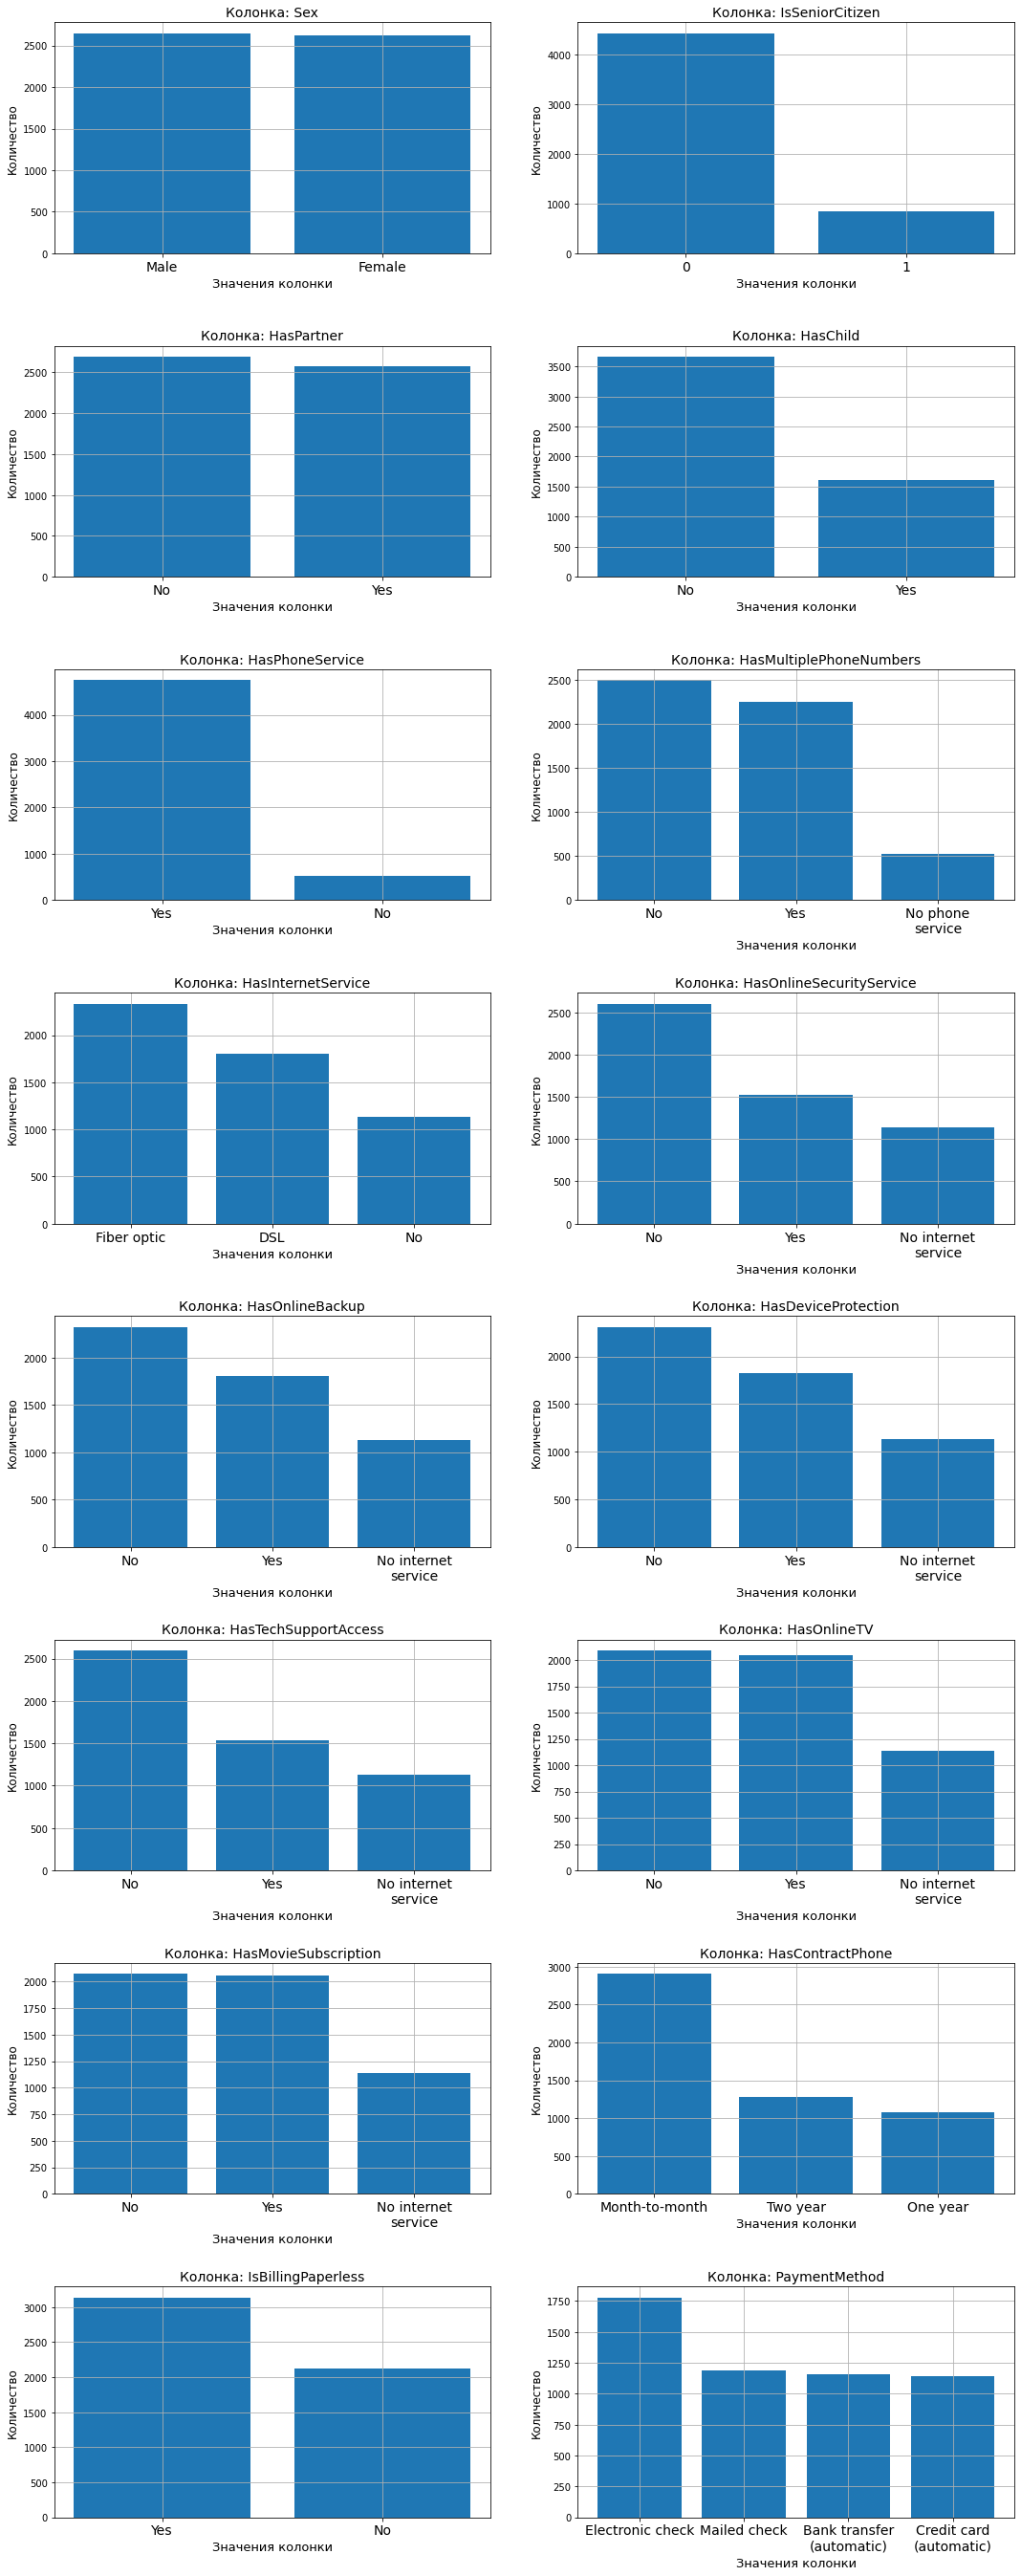

In [ ]:
plt.figure(figsize=(18, 48))

for i in range(len(cat_cols)):
  plt.subplot(len(cat_cols) // 2, 2, 1 + i)
  plt.subplots_adjust(hspace=0.4)
  title = 'Колонка: ' + cat_cols[i]
  plt.title(title , fontsize=14)
  plt.ylabel('Количество', fontsize=12)
  plt.xlabel('Значения колонки', fontsize=13)
  plt.grid(True)
  plt.xticks(ticks=range(0, len(data[cat_cols[i]].value_counts().to_frame())),
             labels=transform_index_to_list(data[cat_cols[i]].value_counts().index),
             fontsize=14)
  
  plt.bar(x=data[cat_cols[i]].value_counts().index, height=data[cat_cols[i]].value_counts())
plt.show()

Отрисуем также и чарты для категориальных полей

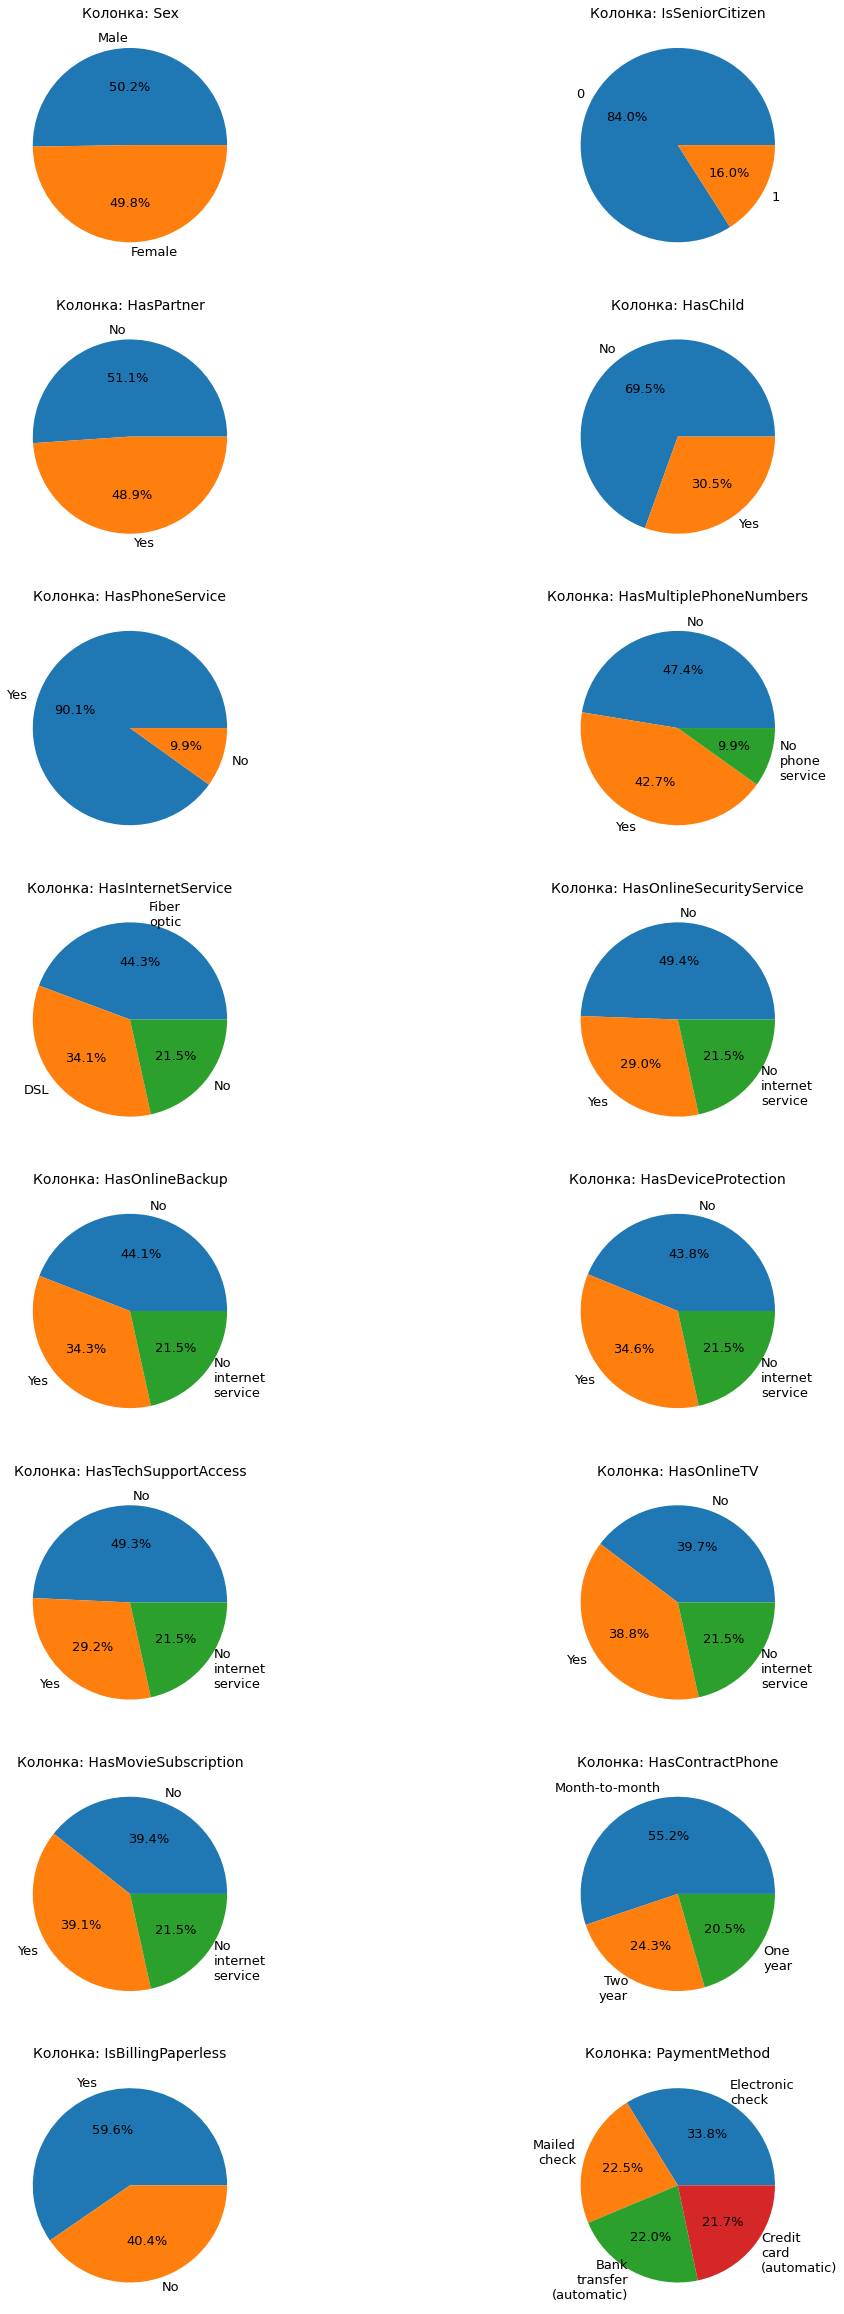

In [ ]:
plt.figure(figsize=(18, 42))

for i in range(len(cat_cols)):
  plt.subplot(len(cat_cols) // 2, 2, 1 + i)
  #plt.subplots_adjust(hspace=0.3)
  title = 'Колонка: ' + cat_cols[i]
  plt.title(title , fontsize=14)
  labels = data[cat_cols[i]].value_counts().index
  plt.pie(x=data[cat_cols[i]].value_counts(), labels=[str(s).replace(' ', '\n') for s in labels],
          autopct='%1.1f%%', textprops={"fontsize":13})
  
plt.show()

________________________________________________________________________________

Посмотрим на значения целевой переменной Churn

In [ ]:
data[target_col].value_counts()

0    3894
1    1374
Name: Churn, dtype: int64

Отношение значений целевой переменной:

In [ ]:
data[target_col].value_counts()[0]/data[target_col].value_counts()[1] # т.к. у нас всего 2 значения

2.834061135371179

In [ ]:
data[target_col].value_counts()[1]/data[target_col].value_counts()[0] 

0.35285053929121724

Делаю вывод, что классы сбалансированы, кол-во значений одного класса примерно в 3 раза больше, чем другого


Посмотрим на среднемесячные траты клиентов, которые отключились(Churn == 1) и оставшихся (Churn == 0)

In [ ]:
data.groupby(by=['Churn'])['MonthlySpending'].mean()

Churn
0    61.645365
1    74.421215
Name: MonthlySpending, dtype: float64

In [ ]:
data.groupby(by=['Churn'])['ClientPeriod'].mean()

Churn
0    37.563431
1    18.074964
Name: ClientPeriod, dtype: float64

In [ ]:
data['ClientPeriod'].mean()

32.48044798785118

Видим, что клиенты, которые отключаются, платили в среднем на 20% больше, чем оставшиеся. Также мы видим, что среднее значение ClientPeriod у отключившихся клиентов значительно меньше, чем у оставшихся. Оно также меньше среднего значения периода по всей выборке.
Посмотрим на кол-во услуг, которыми они пользовались. 


In [ ]:
row_for_count_service = ['HasPhoneService', 'HasMultiplePhoneNumbers', 'HasInternetService', 'HasOnlineSecurityService', \
                         'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription', 'HasContractPhone'] 


In [ ]:
def count_service(row):
    
    """ Функция подсчитывает кол-во услуг, которыми пользуется клиент """

    result = 0 
    if row['HasPhoneService'] == 'Yes':
           result += 1
    if row['HasMultiplePhoneNumbers'] == 'Yes':
      result += 1 
    if row['HasInternetService'] != 'No':
      result += 1
    if row['HasOnlineSecurityService'] == 'Yes':
      result += 1
    if row['HasOnlineBackup'] == 'Yes':
      result += 1
    if row['HasDeviceProtection'] == 'Yes':
      result += 1
    if row['HasTechSupportAccess'] == 'Yes':
      result += 1
    if row['HasOnlineTV'] == 'Yes':
      result += 1
    if row['HasMovieSubscription'] == 'Yes':
      result += 1

    return result

In [ ]:
# del data['count_service']


In [ ]:
# Добавим новую колонку count_service со значением 0 на место перед Churn
data.insert(len(data.columns) - 1, 'count_service', 0)

In [ ]:
# Заполним значения поля count_service
data['count_service'] = data.apply(count_service, axis=1)

In [ ]:
# Проверим правильность заполнения, у нас не должно быть записей с count_service == 0
data[data['count_service'] == 0]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,count_service,Churn


In [ ]:
data[data['Churn'] == 1]['count_service'].mean()

4.066957787481805

In [ ]:
data[data['Churn'] == 0]['count_service'].mean()

4.196969696969697

Т.е. видно, что отключаются клиенты, которые платят больше в сравнении с другими, потребляя практически одинаковый объем услуг(по кол-ву подключенных). По-всей видимости они уходят к конкурентам, предложившим тот же объем услуг дешевле. Возможно и другая ситуация - клиенты платят больше, потребляя больший объем услуг(например, трафика). Либо они платят больше, т.к. у них контракт не годовой и не двухгодичный.

Я предполагаю, что добавленная колонка может пригодится для моделей, поэтому оставлю ее.

Посмотрим на соотношение сервисов, которые пользуется отключенные и оставшиеся клиенты. Для анализа нам понадобится только значения со значениями Yes или аналогами.

Добавим поле cost_service - стоимость сервиса в месяц

In [ ]:
data.insert(len(data.columns) - 1, 'cost_service', 0)

In [ ]:
data['cost_service'] = data['MonthlySpending']/data['count_service']

In [ ]:
data.groupby(by='Churn')['cost_service'].mean()

Churn
0    16.332069
1    19.884911
Name: cost_service, dtype: float64

In [ ]:
for i in range(len(row_for_count_service)):
  a = data[data['Churn'] == 1][row_for_count_service[i]]
  b = data[data['Churn'] == 0][row_for_count_service[i]]
  print(f'Колонка: {start_bold}{row_for_count_service[i]}{end_bold} \nзначения: {a.unique()}')
  for j in range(len(a.value_counts())):
    print(f'Churn == 1 , Значение поля: {start_bold}{sorted(a.unique())[j]}{end_bold}, Кол-во: {a.value_counts().sort_index(ascending=True)[j]}')
    print(f'Churn == 0 , Значение поля: {start_bold}{sorted(b.unique())[j]}{end_bold}, Кол-во: {b.value_counts().sort_index(ascending=True)[j]}')
    print(f'Отношение: {a.value_counts().sort_index(ascending=True)[j]/b.value_counts().sort_index(ascending=True)[j]}')
  print()


Колонка: HasPhoneService 
значения: ['Yes' 'No']
Churn == 1 , Значение поля: No, Кол-во: 129
Churn == 0 , Значение поля: No, Кол-во: 392
Отношение: 0.32908163265306123
Churn == 1 , Значение поля: Yes, Кол-во: 1245
Churn == 0 , Значение поля: Yes, Кол-во: 3502
Отношение: 0.3555111364934323

Колонка: HasMultiplePhoneNumbers 
значения: ['No' 'Yes' 'No phone service']
Churn == 1 , Значение поля: No, Кол-во: 610
Churn == 0 , Значение поля: No, Кол-во: 1887
Отношение: 0.32326444091149975
Churn == 1 , Значение поля: No phone service, Кол-во: 129
Churn == 0 , Значение поля: No phone service, Кол-во: 392
Отношение: 0.32908163265306123
Churn == 1 , Значение поля: Yes, Кол-во: 635
Churn == 0 , Значение поля: Yes, Кол-во: 1615
Отношение: 0.3931888544891641

Колонка: HasInternetService 
значения: ['Fiber optic' 'DSL' 'No']
Churn == 1 , Значение поля: DSL, Кол-во: 340
Churn == 0 , Значение поля: DSL, Кол-во: 1458
Отношение: 0.23319615912208505
Churn == 1 , Значение поля: Fiber optic, Кол-во: 954
Chu

Внимание на колонку **HasTechSupportAccess**.

Churn == 1 , Значение поля: Yes, Кол-во: 228

Churn == 0 , Значение поля: Yes, Кол-во: 1309

Отношение: 0.17417876241405653

Это говорит о том, что клиенты, которые подписаны на соотв. услугу реже отключаются.
Аналогично для колонки **HasOnlineSecurityService**.

Churn == 1 , Значение поля: Yes, Кол-во: 208

Churn == 0 , Значение поля: Yes, Кол-во: 1321

Отношение: 0.15745647236941712

Аналогично для колонки **HasContractPhone**. Чем на больший период клиент заключает контракт, тем меньше вероятность его ухода.

Churn == 1 , Значение поля: Month-to-month, Кол-во: 1231

Churn == 0 , Значение поля: Month-to-month, Кол-во: 1689

Отношение: 0.7288336293664891

Churn == 1 , Значение поля: One year, Кол-во: 120

Churn == 0 , Значение поля: One year, Кол-во: 962

Отношение: 0.12474012474012475

Churn == 1 , Значение поля: Two year, Кол-во: 33

Churn == 0 , Значение поля: Two year, Кол-во: 1247

Отношение: 0.026463512429831595




In [ ]:
data[(data['HasTechSupportAccess']=='Yes') & (data['HasOnlineSecurityService']=='Yes')].groupby(by=['Churn', 'HasContractPhone'])['Churn'].count()

Churn  HasContractPhone
0      Month-to-month      115
       One year            199
       Two year            444
1      Month-to-month       34
       One year             23
       Two year             11
Name: Churn, dtype: int64

In [ ]:
#data.groupby(by=['HasContractPhone','PaymentMethod', 'Churn'])['Churn'].count()

Заменим некоторые значения в категориальных колонках на 'No'. Суть значений при этом не меняется

In [ ]:
data['HasMovieSubscription'] = data['HasMovieSubscription'].replace('No internet service', 'No')
data['HasOnlineTV'] = data['HasOnlineTV'].replace('No internet service', 'No')
data['HasTechSupportAccess'] = data['HasTechSupportAccess'].replace('No internet service', 'No')
data['HasDeviceProtection'] = data['HasDeviceProtection'].replace('No internet service', 'No')
data['HasOnlineBackup'] = data['HasOnlineBackup'].replace('No internet service', 'No')
data['HasOnlineSecurityService'] = data['HasOnlineSecurityService'].replace('No internet service', 'No')
data['HasMultiplePhoneNumbers'] = data['HasMultiplePhoneNumbers'].replace('No phone service', 'No')

Введем новую колонку **importance_service** - Важность сервиса для клиента

In [ ]:
def make_importance_service(row):
    
    """ Функция подсчитывает кол-во важных для клиента услуг.
        При этом учитывается тип контракта - 2 года, 1 год, месяц.
        
        """
    #клиент решает отключиться или нет после одного - двух месяцев работы 
    result = 1
    #if row['HasOnlineSecurityService'] == 'Yes':
    #  result += 1
    #if row['HasTechSupportAccess'] == 'Yes':
    #  result += 1
    #if result == 3:
    #  result += 3 #учет одновременнности подключенния важных услуг
    if row['HasContractPhone'] == 'Two year':
      type_c = 24
    elif row['HasContractPhone'] == 'One year':
      type_c = 12
    elif row['HasContractPhone'] == 'Month-to-month':
      type_c = 1
    #if row['HasInternetService'] == 'Fiber optic':
    #  result -= 1
    #elif row['HasInternetService'] == 'No':
    #  result += 1
    #if row['HasDeviceProtection'] == 'Yes':
    #  result += 1
    #if row['HasOnlineBackup'] == 'Yes':
    #  result += 1
    #if result <= 0:
    #  result = 1
    #result = (row['ClientPeriod'] + 1)** type_c * row['count_service'] / row['cost_service'] / 1000
    
    if row['ClientPeriod']==0:
      result = 1 #клиент не отключится, важность наивысшая
    elif row['ClientPeriod']==1:
      if type_c > 1:
        result = 1
      else:
        result = 0.5
    elif row['ClientPeriod']==2:
      if type_c > 1:
        result = 0.99
      elif type_c > 4:
        result = 1
      else:
        result = 1/(1 + np.exp(-row['ClientPeriod'] * type_c ** 2 / row['cost_service']))
    else:
      result = 1/(1 + np.exp(-row['ClientPeriod'] * type_c ** 2/ row['cost_service']))

    #еще один способ
    if row['ClientPeriod'] < type_c:
      result = 1
    elif row['ClientPeriod']==1:
      result = 0.5
    else:
      result = 1/(1 + np.exp(-row['ClientPeriod'] * type_c ** 2/ row['cost_service']))
    return result

In [ ]:
# Добавим новую колонку importance_service со значением 0 на место перед Churn
data.insert(len(data.columns) - 1, 'importance_service', 0)

In [ ]:
# Заполним значения поля importance_service
data['importance_service'] = data.apply(make_importance_service, axis=1)

In [ ]:
data.groupby(by=['Churn'])['importance_service'].mean()

Churn
0    0.975067
1    0.890109
Name: importance_service, dtype: float64

In [ ]:
data.groupby(by=['ClientPeriod', 'Churn'])['Churn'].count()

ClientPeriod  Churn
0             0          9
1             0        171
              1        272
2             0         81
              1         84
                      ... 
70            1          8
71            0        126
              1          5
72            0        279
              1          5
Name: Churn, Length: 145, dtype: int64

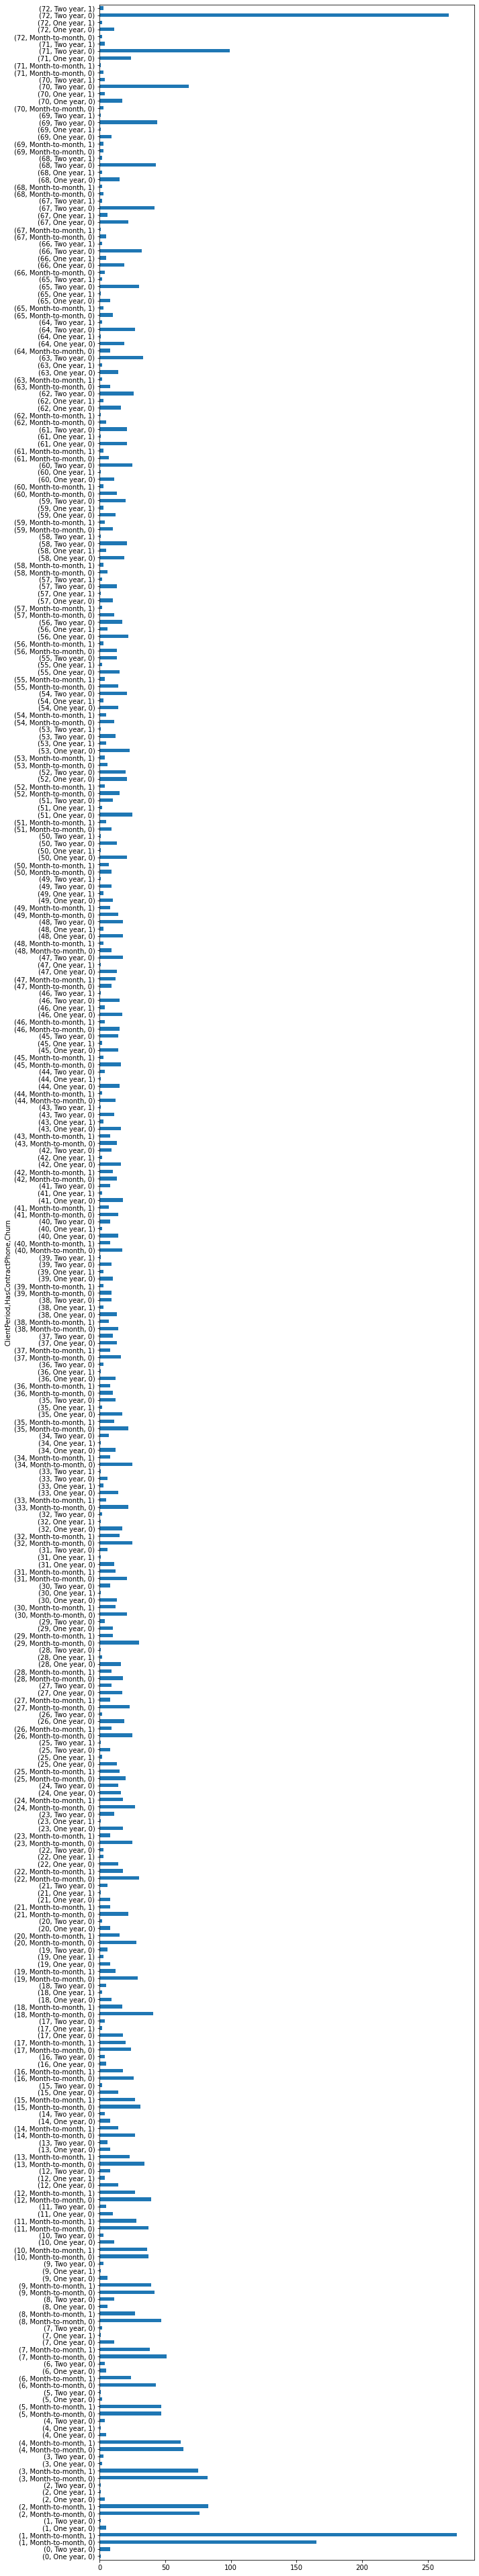

In [ ]:
data.groupby(by=['ClientPeriod', 'HasContractPhone', 'Churn'])['Churn'].count().plot(kind='barh', figsize=(10,70))

In [ ]:
data[(data['ClientPeriod']==1) & (data['HasContractPhone'] == 'Month-to-month')].groupby(by=['Churn'])['Churn'].count()

Churn
0    165
1    272
Name: Churn, dtype: int64

In [ ]:
data[(data['ClientPeriod']<=24) & (data['Churn']==1)].groupby(by=['HasContractPhone'])['Churn'].count()

HasContractPhone
Month-to-month    956
One year           20
Name: Churn, dtype: int64

Разделим клиентов на 3 группы:

1-ая группа, это клиенты, которые пользуются только телефоном,

2-ая группа, это клиенты, которые пользуются только интернетом,

3-ая группа, это клиенты, которые пользуются и интернетом и телефоном

In [ ]:
def make_clients_group(row):
  if row['HasPhoneService'] == 'Yes' and row['HasInternetService'] != 'No':
    result = 3
  elif row['HasPhoneService'] == 'Yes' and row['HasInternetService'] == 'No':
    result = 1
  elif row['HasPhoneService'] == 'No' and row['HasInternetService'] != 'No':
    result = 2
  else:
    result = 4
  return result

In [ ]:
data.insert(len(data.columns) - 1, 'clients_group', 0)

In [ ]:
data['clients_group'] = data.apply(make_clients_group, axis=1)

In [ ]:
data[data['clients_group']==4]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,count_service,cost_service,importance_service,clients_group,Churn


In [ ]:
#data['importance_service'] = data['importance_service']/data.groupby(by=['clients_group'])['importance_service'].transform('mean')

In [ ]:
data.groupby(by=['clients_group', 'Churn'])['ClientPeriod'].mean()

clients_group  Churn
1              0        32.404739
               1         8.850000
2              0        36.663265
               1        15.449612
3              0        39.931753
               1        18.999142
Name: ClientPeriod, dtype: float64

In [ ]:
#data[(data['ClientPeriod']<=3) & (data['Churn']==1)].groupby(by=['clients_group', 'ClientPeriod', 'count_service', 'HasContractPhone'])['clients_group'].count()

In [ ]:
#data.groupby(by=['clients_group', 'Churn'])['importance_service'].mean()

In [ ]:
data.groupby(by=['clients_group', 'Churn'])['Churn'].count()

clients_group  Churn
1              0        1055
               1          80
2              0         392
               1         129
3              0        2447
               1        1165
Name: Churn, dtype: int64

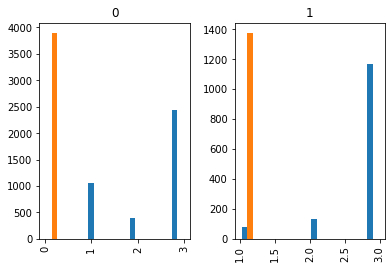

In [ ]:
data[['clients_group', 'Churn']].hist(by=['Churn'], grid=True);

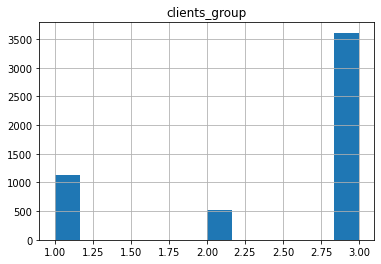

In [ ]:
data[['clients_group']].hist(grid=True, bins=12);

In [ ]:
data.groupby(by=['clients_group'])['MonthlySpending'].mean()

clients_group
1    21.140705
2    42.004415
3    82.066113
Name: MonthlySpending, dtype: float64

Видим, что клиенты 1-й и 2-й группы реже отключаются, а клиенты, которые одновременно пользуются и телефоном и интернет сервисами - чаще. По всей видимости это связано со стоимостью услуг.

In [ ]:
data.groupby(by=['clients_group', 'Churn'])['MonthlySpending'].mean()

clients_group  Churn
1              0        21.193033
               1        20.450625
2              0        43.426913
               1        37.681783
3              0        82.004516
               1        82.195494
Name: MonthlySpending, dtype: float64

Видно, что клиенты, которые отключились в первой и третьей группе платили столько же, как и оставшиеся, а во второй группе клиенты, которые отключились, платили немного меньше, чем оставшиеся

In [ ]:
data.groupby(by=['clients_group', 'Churn'])['cost_service'].mean()

clients_group  Churn
1              0        18.113649
               1        19.213125
2              0        12.869626
               1        15.961150
3              0        16.118629
               1        20.365518
Name: cost_service, dtype: float64

В то же время средняя стоимость услуги среди отключенных клиентов немного выше, чем у оставшихся

In [ ]:
data[data['clients_group']==1].groupby(by=['HasContractPhone', 'Churn'])['HasContractPhone'].count()

HasContractPhone  Churn
Month-to-month    0        315
                  1         70
One year          0        266
                  1          7
Two year          0        474
                  1          3
Name: HasContractPhone, dtype: int64

Видим, что клиенты, которые пользуются только телефоном(1-ая группа) и заключили двухгодичный контракт, практически не отключаются.Также мало отключившихся среди заключивших одногодичный контракт. 

In [ ]:
data[data['clients_group']==1][['HasPhoneService', 'HasContractPhone', 'HasMultiplePhoneNumbers', 'count_service', 'cost_service', 'MonthlySpending']]

,HasPhoneService,HasContractPhone,HasMultiplePhoneNumbers,count_service,cost_service,MonthlySpending
0,Yes,One year,No,1,19.500,19.50
1,Yes,Two year,Yes,2,12.925,25.85
5,Yes,Two year,No,1,19.800,19.80
18,Yes,Two year,No,1,19.850,19.85
22,Yes,Month-to-month,No,1,19.500,19.50
...,...,...,...,...,...,...
5255,Yes,Two year,No,1,20.500,20.50
5257,Yes,Month-to-month,No,1,19.200,19.20
5259,Yes,Two year,Yes,2,12.275,24.55
5269,Yes,Month-to-month,No,1,20.450,20.45


In [ ]:
data[data['clients_group']==2].groupby(by=['HasInternetService', 'Churn'])['HasInternetService'].count()

HasInternetService  Churn
DSL                 0        392
                    1        129
Name: HasInternetService, dtype: int64

Видим, что во вторую группу попали клиенты, у которых способ подключения к интернету - DSL, что странно, т.к. DSL подразумевает использование телефонной линии

In [ ]:
data[(data['clients_group']==2)][['HasPhoneService', 'HasInternetService', 'HasContractPhone', 'HasMultiplePhoneNumbers', 'count_service', 'cost_service', 'MonthlySpending']]

,HasPhoneService,HasInternetService,HasContractPhone,HasMultiplePhoneNumbers,count_service,cost_service,MonthlySpending
9,No,DSL,Two year,No,6,10.2000,61.20
13,No,DSL,Month-to-month,No,4,9.7125,38.85
23,No,DSL,Month-to-month,No,4,11.3250,45.30
30,No,DSL,Month-to-month,No,1,26.0500,26.05
50,No,DSL,Month-to-month,No,2,14.8750,29.75
...,...,...,...,...,...,...,...
5216,No,DSL,Two year,No,2,17.9000,35.80
5219,No,DSL,Two year,No,5,10.9300,54.65
5224,No,DSL,Two year,No,5,9.5200,47.60
5277,No,DSL,Month-to-month,No,2,15.2000,30.40


Судя по рез-ту выборки, клиенты у которых способ подключения DSL, тоже пользуются телефоном, либо поле HasContractPhone - общее поля для всех категорий клиентов, которое означает вид заключенного общего контракта.

In [ ]:
data[data['clients_group']==3].groupby(by=['HasInternetService', 'HasPhoneService', 'HasContractPhone','Churn'])['Churn'].count()

HasInternetService  HasPhoneService  HasContractPhone  Churn
DSL                 Yes              Month-to-month    0        447
                                                       1        177
                                     One year          0        275
                                                       1         28
                                     Two year          0        344
                                                       1          6
Fiber optic         Yes              Month-to-month    0        747
                                                       1        858
                                     One year          0        327
                                                       1         74
                                     Two year          0        307
                                                       1         22
Name: Churn, dtype: int64

In [ ]:
data[(data['clients_group']==3)][['HasPhoneService', 'HasInternetService', 'HasContractPhone', 'HasMultiplePhoneNumbers', 'count_service', 'cost_service', 'MonthlySpending']]

,HasPhoneService,HasInternetService,HasContractPhone,HasMultiplePhoneNumbers,count_service,cost_service,MonthlySpending
2,Yes,Fiber optic,Month-to-month,No,3,25.300000,75.90
3,Yes,Fiber optic,Month-to-month,Yes,4,19.825000,79.30
4,Yes,Fiber optic,Two year,Yes,9,12.805556,115.25
6,Yes,Fiber optic,Month-to-month,Yes,5,18.030000,90.15
7,Yes,DSL,Month-to-month,No,2,22.850000,45.70
...,...,...,...,...,...,...,...
5274,Yes,Fiber optic,Month-to-month,No,2,34.875000,69.75
5276,Yes,Fiber optic,Two year,Yes,7,14.028571,98.20
5279,Yes,DSL,Month-to-month,No,4,13.762500,55.05
5280,Yes,Fiber optic,Month-to-month,Yes,3,25.333333,76.00


Добавим также новое поле **over_cost**, в которое будем записывать превышение стоимости сервиса над средней стоимостью. Значения могут быть и отрицательными, значит стоимость сервиса меньше среднего

In [ ]:
# Добавим новую колонку over_cost со значением 0 на место перед Churn
#data.insert(len(data.columns) - 1, 'over_cost', 0)

In [ ]:
#Создадим временные поля для удобства
#data['MonthlySpending_mean'] = data.groupby(by=['clients_group'])['MonthlySpending'].transform('mean')
#data['count_service_mean'] = data.groupby(by=['clients_group'])['count_service'].transform('mean')
#data['cost_service_mean'] = data['MonthlySpending_mean'] / data['count_service_mean']
#data['over_cost'] = (data['cost_service'] - data['cost_service_mean'])
#data.drop(['MonthlySpending_mean', 'count_service_mean', 'cost_service_mean'], axis=1, inplace=True) #Удаляем временные поля

In [ ]:
#data.groupby(by=['Churn', 'clients_group'])['over_cost'].mean()

Видим, что превышение над средней стоимостью одной услуги выше для отключенных клиентов в каждой из групп

Добавим поле over_client_period_mean. Запишем в нем превышение значения ClientPeriod над средним по всей выборке для каждой из групп

In [ ]:
#data.insert(len(data.columns) - 1, 'over_client_period_mean', 0)

In [ ]:
#data['over_client_period_mean'] = data['ClientPeriod'] / data.groupby(by=['clients_group'])['ClientPeriod'].transform('mean')

In [ ]:
#data.groupby(by=['Churn', 'clients_group'])['over_client_period_mean'].mean()

Видно, что средний срок подключения для отключенных клиентов не превышает 0.57

Построим матрицу корреляции

In [ ]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,count_service,cost_service,importance_service,clients_group,Churn
ClientPeriod,1.00,0.25,0.83,0.01,0.48,-0.49,0.69,0.04,-0.35
MonthlySpending,0.25,1.00,0.65,0.22,0.85,-0.10,0.25,0.85,0.19
TotalSpent,0.83,0.65,1.00,0.09,0.78,-0.42,0.55,0.42,-0.20
IsSeniorCitizen,0.01,0.22,0.09,1.00,0.12,0.08,0.02,0.18,0.16
count_service,0.48,0.85,0.78,0.12,1.00,-0.55,0.45,0.69,-0.02
cost_service,-0.49,-0.10,-0.42,0.08,-0.55,1.00,-0.56,-0.01,0.29
importance_service,0.69,0.25,0.55,0.02,0.45,-0.56,1.00,0.07,-0.32
clients_group,0.04,0.85,0.42,0.18,0.69,-0.01,0.07,1.00,0.23
Churn,-0.35,0.19,-0.20,0.16,-0.02,0.29,-0.32,0.23,1.00


In [ ]:
# Добавим созданные поля численным колонкам
#num_cols.extend(['cost_service'])
num_cols.extend(['count_service','cost_service', 'importance_service'])
#num_cols.extend(['count_service', 'cost_service' ])
#num_cols.extend(['count_service', 'over_cost', 'cost_service' ])
#num_cols.extend(['count_service', 'importance_service', 'over_cost', 'cost_service', 'over_client_period_mean'])
#num_cols.extend(['count_service', 'importance_service', 'over_cost', 'cost_service', 'over_client_period_mean'])
#num_cols.extend(['count_service', 'importance_service', 'over_cost', 'cost_service', 'over_client_period_mean', 'cost_importance'])
#num_cols.extend(['count_service', 'over_cost', 'cost_service', 'over_client_period_mean'])
#num_cols.extend(['count_service', 'importance_service', 'over_cost', 'over_client_period_mean'])
#num_cols.extend(['count_service', 'over_cost', 'over_client_period_mean'])
#num_cols.extend(['count_service', 'importance_service', 'over_cost'])
#num_cols.extend(['importance_service', 'over_cost', 'over_client_period_mean'])

In [ ]:
# Добавим поле 'clients_group' к категориальным
cat_cols.append('clients_group')

In [ ]:
num_cols

['ClientPeriod',
 'MonthlySpending',
 'TotalSpent',
 'count_service',
 'cost_service',
 'importance_service']

In [ ]:
#del data['TotalSpent'] #удалим колонку TotalSpent
#num_cols.remove('TotalSpent')
#del data['MonthlySpending'] #удалим колонку MonthlySpending
#num_cols.remove('MonthlySpending')
#del data['count_service'] #удалим колонку count_service

In [ ]:
data[data.duplicated()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,count_service,cost_service,importance_service,clients_group,Churn


In [ ]:
num_cols

['ClientPeriod',
 'MonthlySpending',
 'TotalSpent',
 'count_service',
 'cost_service',
 'importance_service']

In [ ]:
cat_cols

['Sex',
 'IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasDeviceProtection',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription',
 'HasContractPhone',
 'IsBillingPaperless',
 'PaymentMethod',
 'clients_group']

In [ ]:
#cat_cols.remove('Sex')
#del data['Sex']

#cat_cols.remove('HasPartner')
#del data['HasPartner']

#cat_cols.remove('HasChild')
#del data['HasChild']

#cat_cols.remove('HasOnlineBackup')
#del data['HasOnlineBackup']



In [ ]:
#ProfileReport(data)

________________________________________________________________________________

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, roc_curve

Закодируем категориальные признаки с помощью one-hot-encoding'а

In [ ]:
dummy_features = pd.get_dummies(data[cat_cols])

In [ ]:
dummy_features

,IsSeniorCitizen,clients_group,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1
1,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0
2,0,3,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0
3,1,3,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1
4,0,3,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0,2,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0
5278,0,2,0,1,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0
5279,0,3,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1
5280,0,3,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0


In [ ]:
X = pd.concat([data[num_cols], dummy_features], axis=1)
X_origin = data.iloc[:, :-1]
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,count_service,cost_service,importance_service,IsSeniorCitizen,clients_group,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,1,19.500000,1.000000,0,1,0,1,0,1,0,1,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,2,12.925000,1.000000,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,3,25.300000,0.500000,0,3,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,4,19.825000,0.998432,1,3,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,9,12.805556,1.000000,0,3,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0


In [ ]:
y = data[target_col]

In [ ]:
X.shape, X_origin.shape

((5268, 42), (5268, 23))

Отнормируем числовые признаки

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[ 0.91814941, -1.50721904, -0.55846347, ..., -0.52639425,
        -0.71436762,  1.85521461],
       [ 1.61125999, -1.29676711, -0.18566102, ...,  1.89971679,
        -0.71436762, -0.5390212 ],
       [-1.28349599,  0.36199182, -0.97736764, ..., -0.52639425,
         1.39983948, -0.5390212 ],
       ...,
       [-1.28349599, -0.32901964, -0.98655713, ..., -0.52639425,
        -0.71436762,  1.85521461],
       [-0.14190208,  0.36530602, -0.03446414, ...,  1.89971679,
        -0.71436762, -0.5390212 ],
       [-0.54961419,  0.36199182, -0.40453399, ..., -0.52639425,
        -0.71436762,  1.85521461]])

Разделим нашу обучающуюся выборку на тренировочную и тестовую

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values , test_size=0.2, random_state=42)

В качестве модели используем логистическую регрессию LogisticRegressionCV. Этот класс создан специально для логистической регрессии (для нее известны эффективные алгоритмы перебора параметров). Он перебирает параметры по сетке с последующей кросс-валидацией.

In [ ]:
logit_searcher = LogisticRegressionCV(verbose=1, scoring='roc_auc', refit=True,  n_jobs=-1, random_state=42)
logit_searcher.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished


LogisticRegressionCV(n_jobs=-1, random_state=42, scoring='roc_auc', verbose=1)

Значение наилучшего гиперпараметра C

In [ ]:
logit_searcher.C_

array([166.81005372])

In [ ]:
# Точность модели на тестовой выборке. Используется параметр scoring='roc_auc'
logit_searcher.score(X_train, y_train)

0.8517978584408721

Построим кривую ROC-AUC

In [ ]:
y_train_predicted = logit_searcher.predict_proba(X_train)[:, 1]
y_test_predicted = logit_searcher.predict_proba(X_test)[:, 1]

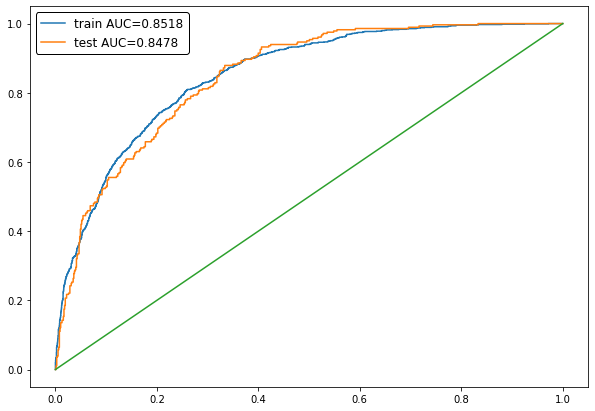

In [ ]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [ ]:
print(start_bold+'Качество на тренировочной и тестовой выборках для логистической регрессии'+end_bold)
print('Параметры логистической регрессии:')
print(logit_searcher)
print()
print('train_auc =', train_auc)
print('test_auc =', test_auc)

Качество на тренировочной и тестовой выборках для логистической регрессии
Параметры логистической регрессии:
LogisticRegressionCV(n_jobs=-1, random_state=42, scoring='roc_auc', verbose=1)

train_auc = 0.8517978584408721
test_auc = 0.8477738441069365


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
#!pip install catboost # установка библиотеки catboost

In [ ]:
import catboost

In [ ]:
cat_cols

['Sex',
 'IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasDeviceProtection',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription',
 'HasContractPhone',
 'IsBillingPaperless',
 'PaymentMethod',
 'clients_group']

In [ ]:
#X_origin.drop(['Sex', 'HasChild', 'HasPartner', 'HasPhoneService'], inplace=True, axis=1)
#X_origin.drop(['importance_service'], inplace=True, axis=1)

In [ ]:
# CatBoost умеет работать с категориальными признаками сам
X_train_origin, X_test_origin, y_train, y_test = train_test_split(X_origin, y, 
                                                       train_size=0.8, 
                                                       random_state=42)

In [ ]:
cat_cols_index = [X_origin.columns.get_loc(c) for c in cat_cols] # Получение номером категориальных колонок

In [ ]:
cat_cols_index

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22]

In [ ]:
boosting_model = catboost.CatBoostClassifier(n_estimators=300, random_seed=100,
                                             cat_features=cat_cols_index) # параметры модели

boosting_model.fit(X_train_origin, y_train, eval_set = (X_test_origin, y_test)) # обучение модели на тестовой выборке

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1] # предсказания обученной модели на тренировочной выборке
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1] # предсказания обученной модели на тестовой выборке

Learning rate set to 0.076324
0:	learn: 0.6447156	test: 0.6453716	best: 0.6453716 (0)	total: 10.7ms	remaining: 3.2s
1:	learn: 0.6068603	test: 0.6076291	best: 0.6076291 (1)	total: 21.3ms	remaining: 3.18s
2:	learn: 0.5750581	test: 0.5759972	best: 0.5759972 (2)	total: 31.2ms	remaining: 3.09s
3:	learn: 0.5467596	test: 0.5483747	best: 0.5483747 (3)	total: 41.8ms	remaining: 3.09s
4:	learn: 0.5247869	test: 0.5270369	best: 0.5270369 (4)	total: 50.5ms	remaining: 2.98s
5:	learn: 0.5057180	test: 0.5081726	best: 0.5081726 (5)	total: 62.4ms	remaining: 3.06s
6:	learn: 0.4905334	test: 0.4936727	best: 0.4936727 (6)	total: 73.3ms	remaining: 3.07s
7:	learn: 0.4770500	test: 0.4807970	best: 0.4807970 (7)	total: 81.9ms	remaining: 2.99s
8:	learn: 0.4674559	test: 0.4726208	best: 0.4726208 (8)	total: 92ms	remaining: 2.98s
9:	learn: 0.4600680	test: 0.4658226	best: 0.4658226 (9)	total: 99.4ms	remaining: 2.88s
10:	learn: 0.4517556	test: 0.4585093	best: 0.4585093 (10)	total: 109ms	remaining: 2.87s
11:	learn: 0.44

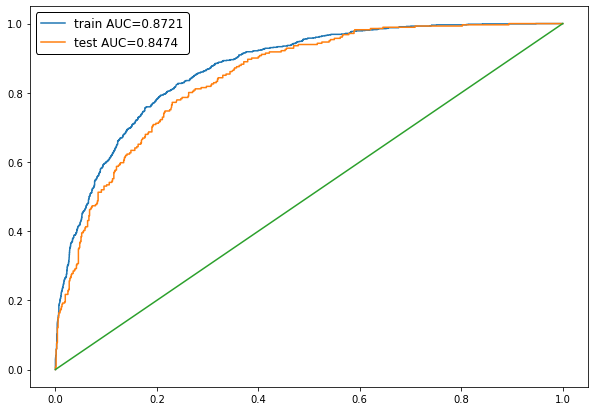

In [ ]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [ ]:
boosting_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,HasContractPhone,13.603736
1,importance_service,12.196108
2,HasInternetService,12.161550
3,MonthlySpending,11.679024
4,ClientPeriod,9.874777
5,PaymentMethod,7.009574
6,cost_service,4.055009
7,IsBillingPaperless,3.923295
8,TotalSpent,3.534562
9,HasMultiplePhoneNumbers,2.973598


Попробуем сделать поиск по сетке для catboost


In [ ]:
boosting_model_gs = catboost.CatBoostClassifier(silent=True,
                                             cat_features=cat_cols_index, random_seed=42,
                                             eval_metric='AUC:hints=skip_train~false'
                                             )
parameters = {'depth' : [4], #, 8], #при 8 модель переучивается - растет качество на тренировочной выборке, но падает на тестовой
              #'learning_rate' : [0.05, 0.1] , # catboost автоматически определяет learning_rate
              'iterations'    : [200, 250], # чем больше значение, тем сильнее модель переучивается, значение AUC на тестовой падает 
              'l2_leaf_reg' : np.linspace(0, 30, 10)
             }


boosting_model_gs.grid_search(parameters,
                              X_train_origin,
                              y_train, cv=3, partition_random_seed=100,
                              plot=False, refit=True)


bestTest = 0.8386256414
bestIteration = 185

0:	loss: 0.8386256	best: 0.8386256 (0)	total: 1.16s	remaining: 22.1s

bestTest = 0.8392729497
bestIteration = 167

1:	loss: 0.8392729	best: 0.8392729 (1)	total: 2.36s	remaining: 21.3s

bestTest = 0.839443712
bestIteration = 132

2:	loss: 0.8394437	best: 0.8394437 (2)	total: 3.54s	remaining: 20.1s

bestTest = 0.8399123155
bestIteration = 172

3:	loss: 0.8399123	best: 0.8399123 (3)	total: 4.73s	remaining: 18.9s

bestTest = 0.8381451241
bestIteration = 198

4:	loss: 0.8381451	best: 0.8399123 (3)	total: 5.92s	remaining: 17.8s

bestTest = 0.8389115689
bestIteration = 194

5:	loss: 0.8389116	best: 0.8399123 (3)	total: 7.12s	remaining: 16.6s

bestTest = 0.8396184455
bestIteration = 197

6:	loss: 0.8396184	best: 0.8399123 (3)	total: 8.32s	remaining: 15.5s

bestTest = 0.8397534669
bestIteration = 138

7:	loss: 0.8397535	best: 0.8399123 (3)	total: 9.5s	remaining: 14.3s

bestTest = 0.8400552793
bestIteration = 158

8:	loss: 0.8400553	best: 0.8400553 (

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [ ]:
boosting_model_gs.get_params() #параметры модели, используемые для обучения

{'cat_features': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22],
 'depth': 4,
 'eval_metric': 'AUC:hints=skip_train~false',
 'iterations': 200,
 'l2_leaf_reg': 26.666666666666668,
 'random_seed': 42,
 'silent': True}

In [ ]:
boosting_model_gs.get_feature_importance(prettified=True)

,Feature Id,Importances
0,importance_service,24.962849
1,HasInternetService,15.514561
2,HasContractPhone,14.155358
3,MonthlySpending,12.098950
4,ClientPeriod,7.887295
5,PaymentMethod,3.980451
6,TotalSpent,3.926932
7,IsBillingPaperless,2.773009
8,HasOnlineSecurityService,2.114814
9,HasTechSupportAccess,2.063828


In [ ]:
y_train_predicted = boosting_model_gs.predict_proba(X_train_origin)[:, 1] # предсказания обученной модели на тренировочной выборке
y_test_predicted = boosting_model_gs.predict_proba(X_test_origin)[:, 1] # предсказания обученной модели на тестовой выборке

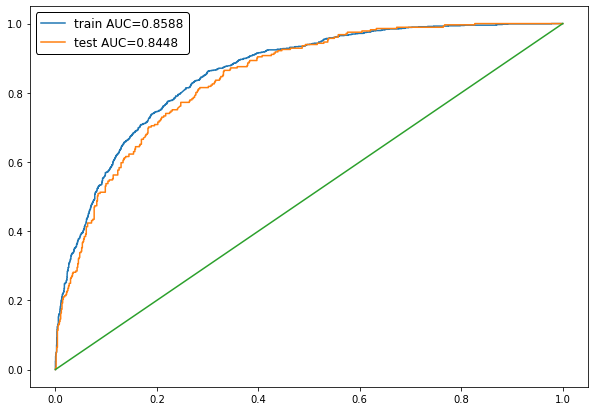

In [ ]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

# Предсказания

In [ ]:
best_model = boosting_model_gs # Выбираем лучшую модель. У нее лучшее значение AUC на X_test

In [ ]:
X_test = pd.read_csv('./test.csv')


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [ ]:
#Видим, что необходимо преобразовать колонку TotalSpent к численному типу
X_test['TotalSpent'] = pd.to_numeric(X_test['TotalSpent'], errors='coerce').fillna(0)

In [ ]:
X_test[X_test['TotalSpent']==0]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
177,0,19.85,0.0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
767,0,20.25,0.0,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   float64
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [ ]:
# добавляем колонку count_service
X_test['count_service'] = X_test.apply(count_service, axis=1)

In [ ]:
X_test['cost_service'] = X_test['MonthlySpending']/X_test['count_service']

In [ ]:
X_test['HasMovieSubscription'] = X_test['HasMovieSubscription'].replace('No internet service', 'No')
X_test['HasOnlineTV'] = X_test['HasOnlineTV'].replace('No internet service', 'No')
X_test['HasTechSupportAccess'] = X_test['HasTechSupportAccess'].replace('No internet service', 'No')
X_test['HasDeviceProtection'] = X_test['HasDeviceProtection'].replace('No internet service', 'No')
X_test['HasOnlineBackup'] = X_test['HasOnlineBackup'].replace('No internet service', 'No')
X_test['HasOnlineSecurityService'] = X_test['HasOnlineSecurityService'].replace('No internet service', 'No')
X_test['HasMultiplePhoneNumbers'] = X_test['HasMultiplePhoneNumbers'].replace('No phone service', 'No')

In [ ]:
# добавляем колонку importance_service
X_test['importance_service'] = X_test.apply(make_importance_service, axis=1)

In [ ]:

#del X_test['count_service'] #удалим колонку count_service

In [ ]:
X_test['clients_group'] = X_test.apply(make_clients_group, axis=1)
#X_test['importance_service'] = X_test['importance_service']/X_test.groupby(by=['clients_group'])['importance_service'].transform('mean')

In [ ]:
# добавляем колонку over_cost
#Создадим временные поля для удобства
#X_test['MonthlySpending_mean'] = X_test.groupby(by=['clients_group'])['MonthlySpending'].transform('mean')
#X_test['count_service_mean'] = X_test.groupby(by=['clients_group'])['count_service'].transform('mean')
#X_test['cost_service_mean'] = X_test['MonthlySpending_mean'] / X_test['count_service_mean']
#X_test['over_cost'] = (X_test['cost_service'] - X_test['cost_service_mean'])
#X_test.drop(['MonthlySpending_mean', 'count_service_mean', 'cost_service_mean'], axis=1, inplace=True) #Удаляем временные поля


In [ ]:
# добавляем колонку over_client_period_mean

#X_test['over_client_period_mean'] = X_test['ClientPeriod'] / X_test.groupby(by=['clients_group'])['ClientPeriod'].transform('mean')

In [ ]:
#del X_test['TotalSpent'] #удалим колонку TotalSpent
#del X_test['MonthlySpending'] #удалим колонку MonthlySpending


In [ ]:
#X_test.drop(['Sex', 'HasPartner', 'HasChild'], inplace=True, axis=1)
#X_test.drop(['importance_service'], inplace=True, axis=1)

In [ ]:
X_train_origin.columns.to_list()

['ClientPeriod',
 'MonthlySpending',
 'TotalSpent',
 'Sex',
 'IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasDeviceProtection',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription',
 'HasContractPhone',
 'IsBillingPaperless',
 'PaymentMethod',
 'count_service',
 'cost_service',
 'importance_service',
 'clients_group']

In [ ]:
X_test.columns.to_list()

['ClientPeriod',
 'MonthlySpending',
 'TotalSpent',
 'Sex',
 'IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasDeviceProtection',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription',
 'HasContractPhone',
 'IsBillingPaperless',
 'PaymentMethod',
 'count_service',
 'cost_service',
 'importance_service',
 'clients_group']

In [ ]:
X_train_origin.columns.to_list() == X_test.columns.to_list()

True

In [ ]:
X_test.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,count_service,cost_service,importance_service,clients_group
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic),4,14.025000,1.000000,3
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,6,16.416667,0.854022,3
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,3,25.416667,0.587611,3
3,67,74.00,4868.40,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic),7,10.571429,1.000000,3
4,71,20.10,1389.60,Female,0,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Two year,No,Bank transfer (automatic),1,20.100000,1.000000,1


In [ ]:
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]


submission.to_csv('./my_submission.csv', index=False)

In [ ]:
submission

,Id,Churn
0,0,0.045644
1,1,0.650621
2,2,0.639502
3,3,0.027064
4,4,0.010260
...,...,...
1756,1756,0.109095
1757,1757,0.015221
1758,1758,0.766362
1759,1759,0.564074


Отправляем результат на kaggle. После серии экспериментов результат на kaggle стал равен **0.85367**.


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.